In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load real dataset
df = pd.read_csv("C:/Users/jhumu/Downloads/data.csv")
df = df.drop(columns=["Unnamed: 32", "id"], errors="ignore")

# Encode target
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])  # M = 1, B = 0


=== Real Data Sample ===
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ..

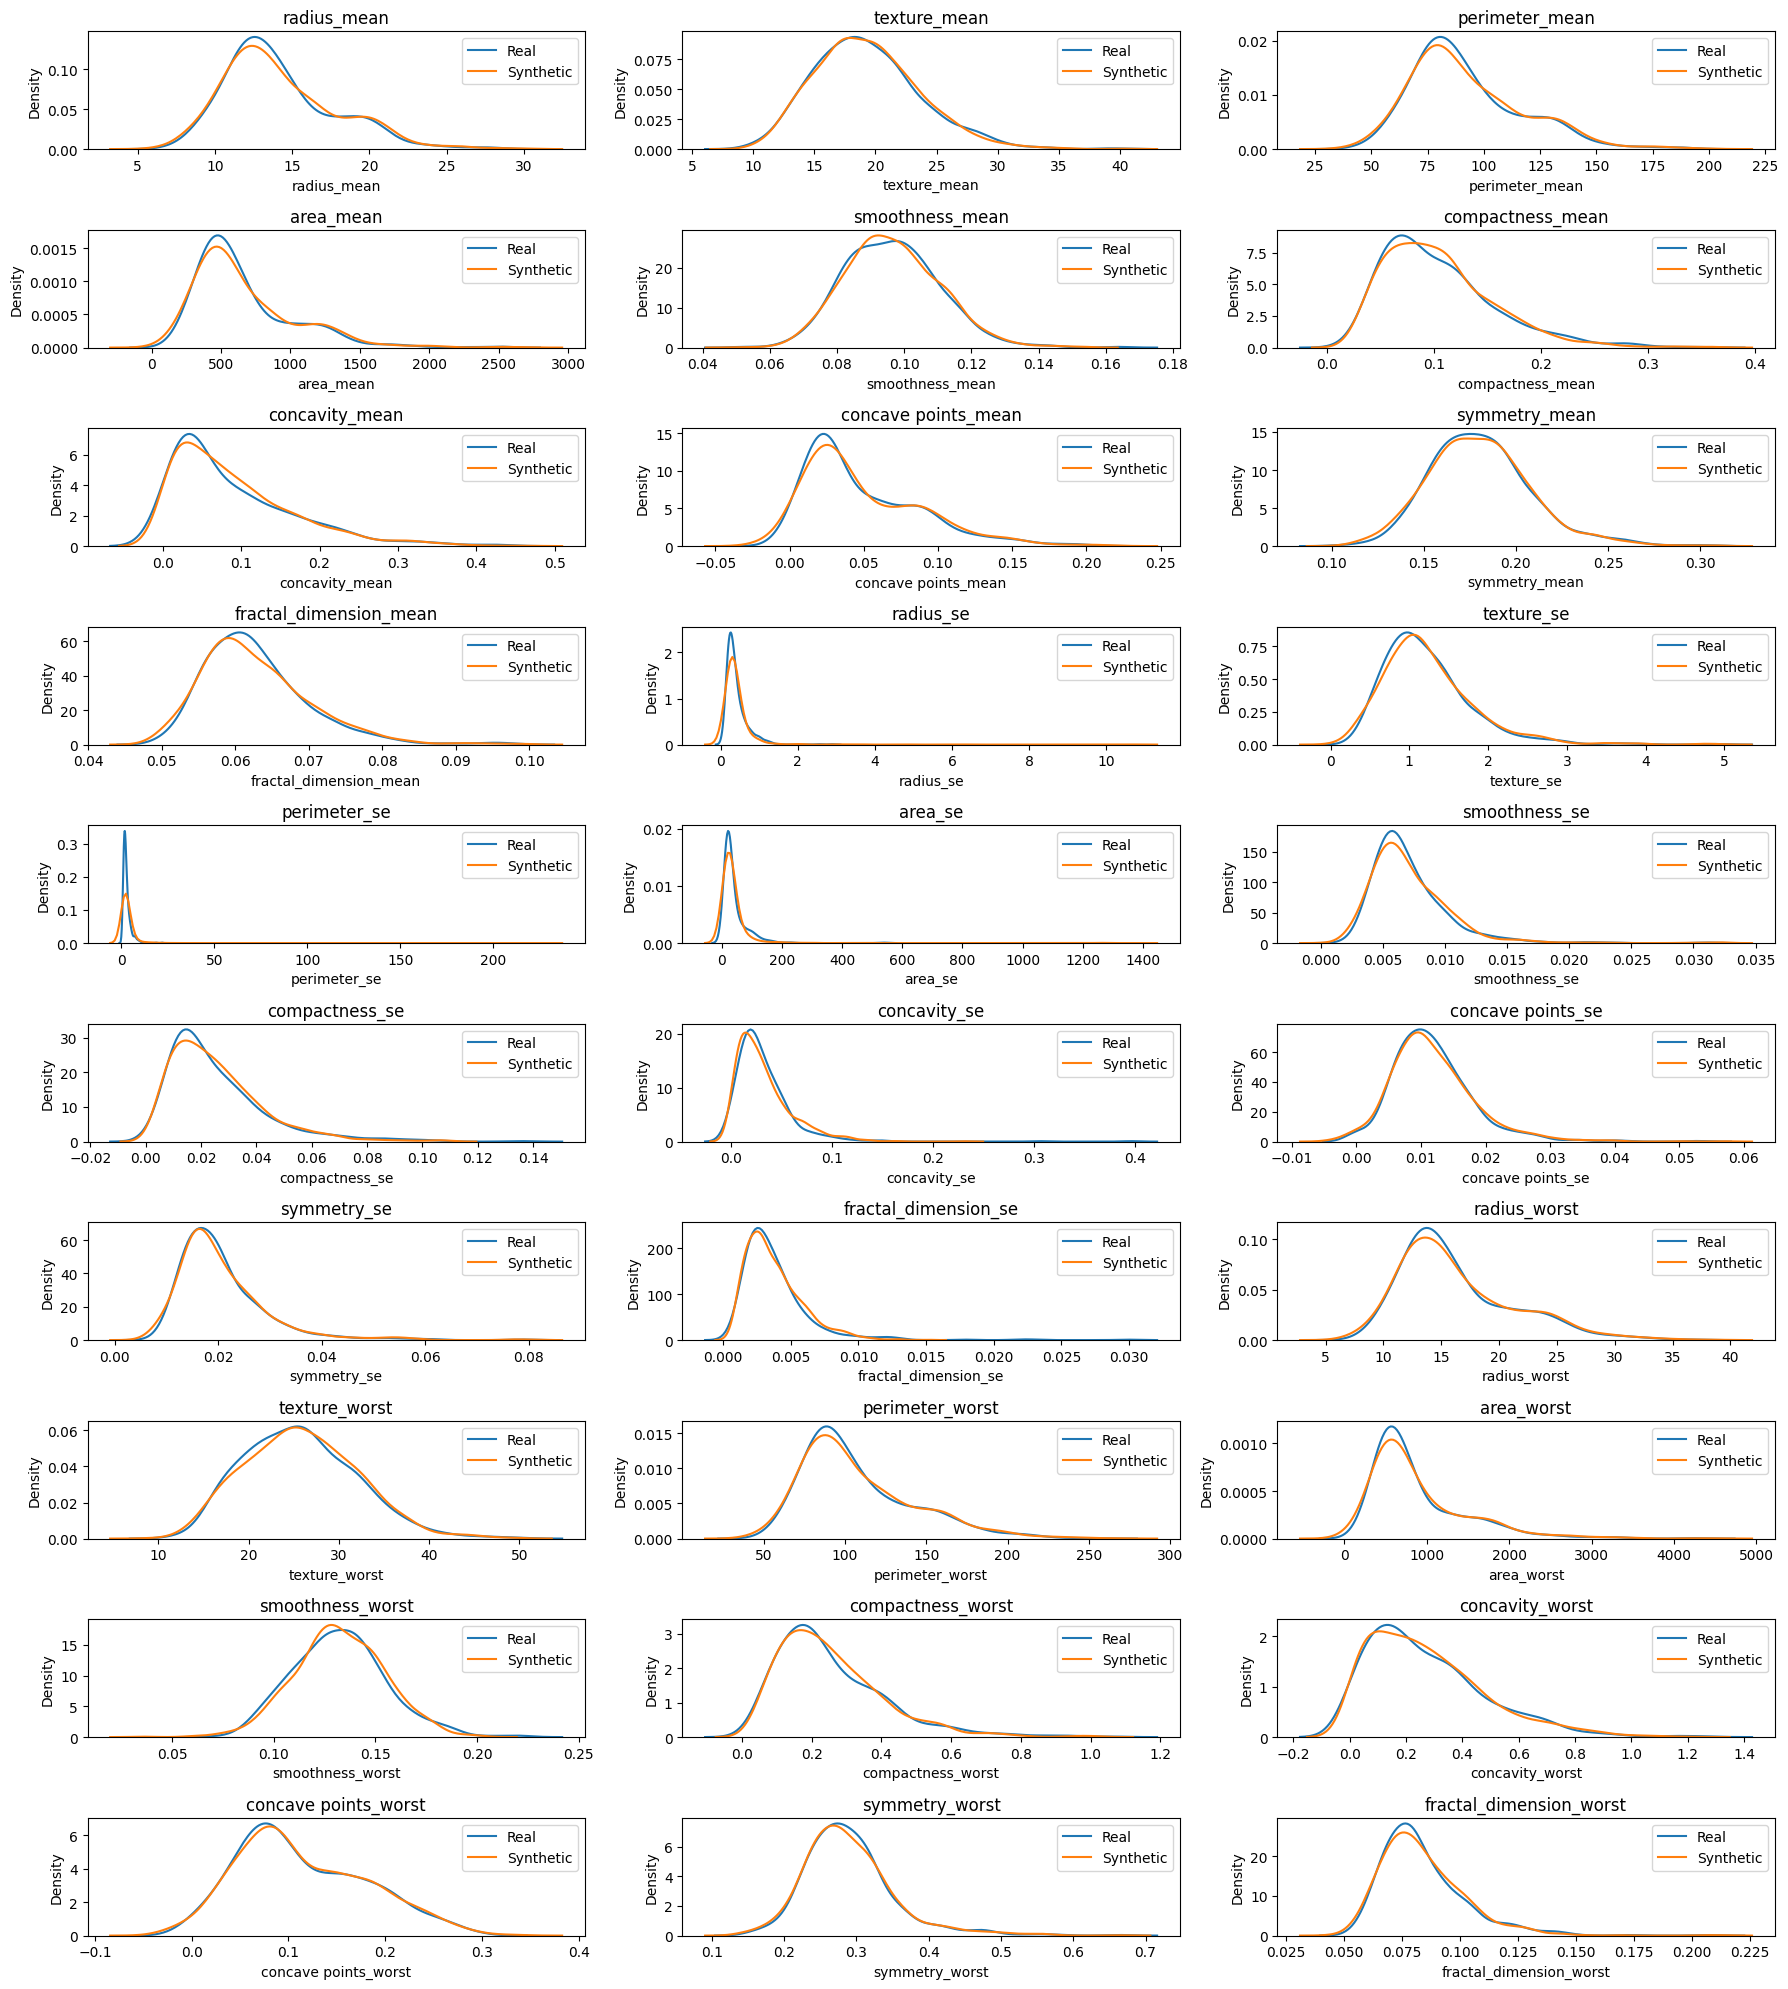

✅ Improved Copula-based data saved.


In [5]:
from copulas.multivariate import GaussianMultivariate
import numpy as np

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/jhumu/Downloads/data.csv")
df = df.drop(columns=["Unnamed: 32", "id"], errors="ignore")

# Encode diagnosis target
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])  # M=1, B=0

print("=== Real Data Sample ===")
print(df.head())
print(f"Real data shape: {df.shape}")

# Fit model
copula_model = GaussianMultivariate()
copula_model.fit(df)

# Generate synthetic data (2x size)
synthetic_copula_df = copula_model.sample(num_rows=len(df) * 2)

# Clean extreme or invalid values
synthetic_copula_df = synthetic_copula_df.replace([np.inf, -np.inf], np.nan).dropna()

# Fix diagnosis column (ensure binary)
synthetic_copula_df["diagnosis"] = synthetic_copula_df["diagnosis"].apply(lambda x: 1 if x > 0.5 else 0)

print("\n=== Synthetic Copula Data Sample ===")
print(synthetic_copula_df.head())
print(f"Synthetic data shape: {synthetic_copula_df.shape}")

# Plot real vs synthetic distributions (numerical columns only)
num_cols = df.select_dtypes(include='number').columns.drop('diagnosis')
fig, axs = plt.subplots(len(num_cols) // 3, 3, figsize=(18, 20))
axs = axs.flatten()

for i, col in enumerate(num_cols[:len(axs)]):
    sns.kdeplot(df[col], label="Real", ax=axs[i])
    sns.kdeplot(synthetic_copula_df[col], label="Synthetic", ax=axs[i])
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()

# Save
synthetic_copula_df.to_csv("C:/Users/jhumu/Regular Use/JupyNote/synthetic_data_copula_improved1.csv", index=False)
print("✅ Improved Copula-based data saved.")
